In [1]:
#!sudo apt install tesseract-ocr
#!sudo apt-get install tesseract-ocr-kor
!pip install pytesseract==0.3.9

In [1]:
import cv2
import re
import pandas as pd
import numpy as np
import pytesseract
from pytesseract import Output
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score

In [2]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [3]:
def get_accuracy(answer_df, predict_df):
    return accuracy_score(answer_df['text'].values, predict_df['text'].values)

In [4]:
import matplotlib.pyplot as plt

In [5]:
img1 = cv2.imread('./train/train_0000.png')

In [6]:
img1

array([[[242, 226, 219],
        [242, 226, 219],
        [244, 229, 220],
        ...,
        [239, 223, 216],
        [241, 225, 218],
        [239, 223, 216]],

       [[240, 223, 214],
        [240, 223, 214],
        [246, 227, 219],
        ...,
        [233, 223, 213],
        [234, 224, 214],
        [237, 225, 215]],

       [[232, 208, 202],
        [235, 211, 205],
        [236, 213, 205],
        ...,
        [240, 224, 218],
        [240, 224, 218],
        [241, 225, 218]],

       ...,

       [[ 58,  34,  22],
        [ 56,  32,  20],
        [ 55,  31,  19],
        ...,
        [ 94,  53,  38],
        [102,  61,  46],
        [102,  62,  44]],

       [[ 56,  31,  21],
        [ 57,  32,  22],
        [ 57,  32,  22],
        ...,
        [ 79,  43,  27],
        [ 85,  49,  33],
        [ 87,  51,  35]],

       [[ 53,  28,  18],
        [ 56,  31,  21],
        [ 54,  29,  19],
        ...,
        [ 65,  34,  19],
        [ 62,  31,  16],
        [ 65,  32,  17]]

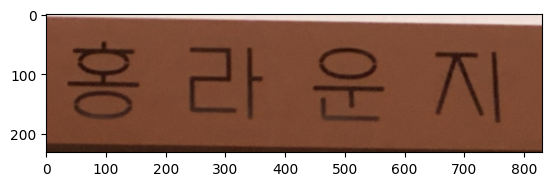

In [7]:
plt.imshow(img1, interpolation='bicubic')
plt.show()

In [8]:
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [9]:
img2

array([[[219, 226, 242],
        [219, 226, 242],
        [220, 229, 244],
        ...,
        [216, 223, 239],
        [218, 225, 241],
        [216, 223, 239]],

       [[214, 223, 240],
        [214, 223, 240],
        [219, 227, 246],
        ...,
        [213, 223, 233],
        [214, 224, 234],
        [215, 225, 237]],

       [[202, 208, 232],
        [205, 211, 235],
        [205, 213, 236],
        ...,
        [218, 224, 240],
        [218, 224, 240],
        [218, 225, 241]],

       ...,

       [[ 22,  34,  58],
        [ 20,  32,  56],
        [ 19,  31,  55],
        ...,
        [ 38,  53,  94],
        [ 46,  61, 102],
        [ 44,  62, 102]],

       [[ 21,  31,  56],
        [ 22,  32,  57],
        [ 22,  32,  57],
        ...,
        [ 27,  43,  79],
        [ 33,  49,  85],
        [ 35,  51,  87]],

       [[ 18,  28,  53],
        [ 21,  31,  56],
        [ 19,  29,  54],
        ...,
        [ 19,  34,  65],
        [ 16,  31,  62],
        [ 17,  32,  65]]

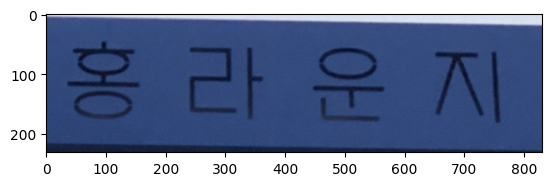

In [10]:
plt.imshow(img2, interpolation='bicubic')
plt.show()

In [14]:
text = pytesseract.image_to_string(img2)

In [15]:
text

''

In [11]:
reader = easyocr.Reader(['ko', 'en'], gpu = False, verbose = False)
reader

NameError: name 'easyocr' is not defined

In [27]:
class PyTesseract:
    def __init__(self, lang='kor'):
        self.lang = lang
    
    def load_image(self, img_path):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img

    def text_preprocessing(self, text):
        text = text.replace('\n', '')
        text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','', text)
        text = text.strip()
        return text
    
    def prediction(self, img_path_list):
        preds = []
        for img_path in tqdm(img_path_list):
            img = self.load_image(img_path)
            text = pytesseract.image_to_string(img, lang=self.lang)
            text = self.text_preprocessing(text)
            preds.append(text)
        print('Done.')
        return preds

In [28]:
tesseract_model = PyTesseract()

In [29]:
train_df

,img_path,text
0,./train/train_00001.png,골목미용실
1,./train/train_00002.png,한성부동산
2,./train/train_00003.png,홍라운지
3,./train/train_00004.png,모단걸응접실
4,./train/train_00005.png,씨앗양식
...,...,...
12154,./train/train_12161.png,넬슨
12155,./train/train_12162.png,앤드루 램버트 지음
12156,./train/train_12163.png,박아람 옮김
12157,./train/train_12164.png,판결의


In [30]:
train_df.columns

Index(['img_path', 'text'], dtype='object')

In [32]:
train_predicts = tesseract_model.prediction(train_df['img_path'].values)

  0%|          | 0/12159 [00:00<?, ?it/s]

Done.


In [33]:
train_predict_df = train_df.copy()
train_predict_df['text'] = train_predicts
print('Train Accuracy : ', get_accuracy(train_df, train_predict_df))

Train Accuracy :  0.0010691668722756806


In [34]:
test_predicts = tesseract_model.prediction(test_df['img_path'].values)

  0%|          | 0/3669 [00:00<?, ?it/s]

Done.


In [35]:
submit = pd.read_csv('./sample_submission.csv')
submit['text'] = test_predicts
submit.to_csv('./submit.csv', index=False, encoding="utf-8-sig")